In [400]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.8.0 (default, Nov  6 2019, 15:49:01) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [458]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*BLNLIGHT_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*BLNLIGHT_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*BLNLIGHT_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*BLNLIGHT_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, 
#het_lab_coord, het_reg_deltaff, het_reg_bind, 
#hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6d

# Process data

In [459]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*')) 
wt_lab_coord = list(np.append(wt_lab_coord[0],wt_lab_coord[2:]))
wt_reg_deltaff = sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))
wt_reg_deltaff = list(np.append(wt_reg_deltaff[0],wt_reg_deltaff[2:]))
wt_reg_bind = sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))
wt_reg_bind = list(np.append(wt_reg_bind[0],wt_reg_bind[2:]))


het_lab_coord = sorted(glob.glob('*1+-*BLNLIGHT_*labcoord.npy*')) [1:]
het_reg_deltaff = sorted(glob.glob('*1+-*BLNLIGHT_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*BLNLIGHT_*regbinarised.npy*'))[1:]

hom_lab_coord = sorted(glob.glob('*1---*BLNLIGHT_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))
hom_reg_deltaff = list(np.append(hom_reg_deltaff[0],hom_reg_deltaff[2:]))
hom_reg_bind = sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))
hom_reg_bind = list(np.append(hom_reg_bind[0],hom_reg_bind[2:]))
#wt_lab_coord, wt_reg_deltaff, wt_reg_bind, 
het_lab_coord, het_reg_deltaff, het_reg_bind, 
#hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLN

In [457]:
#PTZ
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*PTZ*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*PTZ*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*PTZ*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*PTZ*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*PTZ*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*PTZ*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*PTZ*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind
#het_lab_coord, het_reg_deltaff, het_reg_bind
#hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy'])

# Single cell properties - spontaneous



In [460]:
#cell number
coord_ch = np.concatenate((wt_lab_coord,het_lab_coord,hom_lab_coord))
dff_ch = np.concatenate((wt_reg_deltaff,het_reg_deltaff,hom_reg_deltaff))
bind_ch = np.concatenate((wt_reg_bind,het_reg_bind,hom_reg_bind))
time = 9828

celln_l, cond_l, nom_l = [],[],[]
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')

    celln_l.append(trace.shape[0])
    cond_l.append(dff_ch[i][dff_ch[i].find('FOXG1'):dff_ch[i].find('FOXG1')+7])
    nom_l.append(dff_ch[i][:dff_ch[i].find('2photon')-1])
    # print(i)
    print(trace.shape)
    
df = pd.DataFrame({'ncells': celln_l, 'condition': cond_l, 'name': nom_l})

(1487, 9828)
(1557, 9828)
(1902, 9828)
(1632, 9828)
(1339, 9828)
(896, 9828)
(1322, 9828)
(1558, 9828)
(1322, 9828)
(1260, 9828)
(1089, 9828)
(1024, 9828)
(1853, 9828)
(789, 9828)


In [461]:
from scipy import stats
data_str = 'ncells'
data1 = df[df['condition'] == 'FOXG1++'][data_str]
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

data2 = df[df['condition'] == 'FOXG1+-'][data_str]
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

data3 = df[df['condition'] == 'FOXG1--'][data_str]
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1644.5 90.79509898667439
1282.8333333333333 87.95848136731583
1188.75 230.60080044671716


In [ ]:
#cell number
import scipy.stats as stats

# Function to check normality and choose the appropriate test
def compare_data(data1, data2, alpha):
    # Check normality using Shapiro-Wilk test
    normal1 = stats.shapiro(data1)[1] > alpha
    normal2 = stats.shapiro(data2)[1] > alpha
    
    print(f"Normality test for data1: {'Normal' if normal1 else 'Not normal'}")
    print(f"Normality test for data2: {'Normal' if normal2 else 'Not normal'}")
    
    # If both datasets are normal, use t-test
    if normal1 and normal2:
        t_stat, p_value = stats.ttest_ind(data1, data2)
        print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')
    else:
        # If any dataset is not normal, use Mann-Whitney U test
        U, p_value = stats.mannwhitneyu(data1, data2)
        print(f'Mann-Whitney U test: U = {U}, p-value = {p_value}')
    
    # Compare p-value with the significance level
    if p_value < alpha:
        print(f"Result: Significant (p < {alpha})")
    else:
        print(f"Result: Not significant (p >= {alpha})")

# Set significance level after Bonferroni correction
alpha=0.05
# Perform comparisons for data1 vs data2, and data1 vs data3
print('Comparison: data1 vs data2')
compare_data(data1, data2, alpha)

print('\nComparison: data1 vs data3')
compare_data(data1, data3, alpha)


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', pale

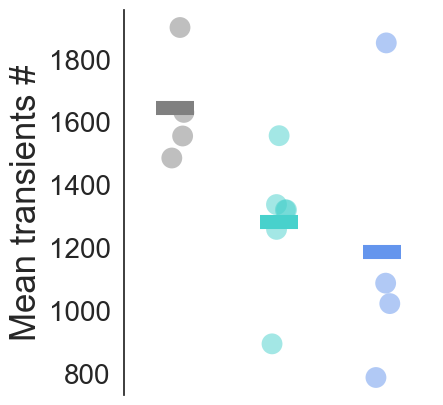

In [462]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y=data_str, data=df, hue = 'condition', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.show()

In [483]:
%autoreload
#compute remaining stats
coord_ch = np.concatenate((wt_lab_coord,het_lab_coord,hom_lab_coord))
dff_ch = np.concatenate((wt_reg_deltaff,het_reg_deltaff,hom_reg_deltaff))
bind_ch = np.concatenate((wt_reg_bind,het_reg_bind,hom_reg_bind))
time = 9828

fr_l, fa_l, fd_l, sc_l, lc_l, dim_l, cond_l, nom_l = [],[],[],[],[],[],[],[]
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')

    name = dff_ch[i][:dff_ch[i].find('2photon')-1]
    run=tfn.trace_analyse(name=name, trace=trace, dff= dff, bind= bind, coord= coord).firing_stats(denominator=9828/2.73, cutoff=50)
    fr_l.append(run.__dict__['fr'])
    fa_l.append(run.__dict__['fa'])
    fd_l.append(run.__dict__['fd'])
    sc_l.append(run.__dict__['s_corr'])
    lc_l.append(run.__dict__['l_corr'])
    dim_l.append(run.__dict__['dim'])

    cond_l.append(dff_ch[i][dff_ch[i].find('FOXG1'):dff_ch[i].find('FOXG1')+7])
    nom_l.append(name)
    # print(i)
    print(trace.shape)
    
df = pd.DataFrame({'event rate': fr_l,'event amplitude': fa_l,'event duration': fd_l,
                   's_corr': sc_l,'l_corr': lc_l,'dim': dim_l, 'condition': cond_l, 'name': nom_l})

Loaded BLNLIGHTPTZ-FOXG1++-01
Firing rate calculated
Firing amplitude calculated
Firing duration calculated
Correlation calculated
Dimensionality calculated
(1487, 9828)
Loaded BLNLIGHTPTZ-FOXG1++-03
Firing rate calculated
Firing amplitude calculated
Firing duration calculated
Correlation calculated
Dimensionality calculated
(1557, 9828)
Loaded BLNLIGHTPTZ-FOXG1++-04
Firing rate calculated
Firing amplitude calculated
Firing duration calculated
Correlation calculated
Dimensionality calculated
(1902, 9828)
Loaded BLNLIGHTPTZ-FOXG1++-05
Firing rate calculated
Firing amplitude calculated
Firing duration calculated
Correlation calculated
Dimensionality calculated
(1632, 9828)
Loaded BLNLIGHTPTZ-FOXG1+--03
Firing rate calculated
Firing amplitude calculated
Firing duration calculated
Correlation calculated
Dimensionality calculated
(1339, 9828)
Loaded BLNLIGHTPTZ-FOXG1+--04
Firing rate calculated
Firing amplitude calculated
Firing duration calculated
Correlation calculated
Dimensionality calc

In [480]:
df

event rate  event amplitude  event duration    s_corr    l_corr  \
0   230.402930         4.886590        1.435352  0.030888  0.025176   
1   186.813187         7.745785        1.417983  0.075330  0.068160   
2   405.311355         4.558536        1.612973  0.093336  0.079094   
3   299.633700         5.215908        1.487143  0.050005  0.043390   
4   310.622711         5.329333        1.495648  0.033240  0.028977   
5   276.556777         4.174244        1.421043  0.056289  0.045005   
6   279.120879         5.191841        1.513408  0.046878  0.042521   
7   226.190476         6.481619        1.419865  0.045787  0.039702   
8   324.908425         4.942876        1.518495  0.046034  0.039455   
9   111.904762         8.596129        1.184698  0.066167  0.058769   
10  181.318681         3.887190        1.271053  0.052898  0.048458   
11  363.919414         4.727602        1.464705  0.045519  0.033539   
12  284.249084         4.304890        1.534569  0.112167  0.095800   
13  180.219780         4.697262        1.188007  0.050724  0.043168   

           dim condition                    name  
0   141.855665   FOXG1++  BLNLIGHTPTZ-FOXG1++-01  
1    25.238893   FOXG1++  BLNLIGHTPTZ-FOXG1++-03  
2    20.833756   FOXG1++  BLNLIGHTPTZ-FOXG1++-04  
3   105.314605   FOXG1++  BLNLIGHTPTZ-FOXG1++-05  
4   126.417781   FOXG1+-  BLNLIGHTPTZ-FOXG1+--03  
5    45.406083   FOXG1+-  BLNLIGHTPTZ-FOXG1+--04  
6    49.945563   FOXG1+-  BLNLIGHTPTZ-FOXG1+--05  
7    84.631563   FOXG1+-  BLNLIGHTPTZ-FOXG1+--06  
8    93.197334   FOXG1+-  BLNLIGHTPTZ-FOXG1+--07  
9    25.326535   FOXG1+-  BLNLIGHTPTZ-FOXG1+--08  
10   55.655938   FOXG1--  BLNLIGHTPTZ-FOXG1---02  
11   66.937771   FOXG1--  BLNLIGHTPTZ-FOXG1---04  
12   15.203604   FOXG1--  BLNLIGHTPTZ-FOXG1---05  
13   83.040716   FOXG1--  BLNLIGHTPTZ-FOXG1---06

In [484]:
#mean spike rate
from scipy import stats
data_str = 'event rate'
data1 = df[df['condition'] == 'FOXG1++'][data_str]
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

data2 = df[df['condition'] == 'FOXG1+-'][data_str]
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

data3 = df[df['condition'] == 'FOXG1--'][data_str]
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

0.32550805062186755 0.043217655563829956
0.29721243969393635 0.037154918381032936
0.27213892203995327 0.03866850148025087


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', pale

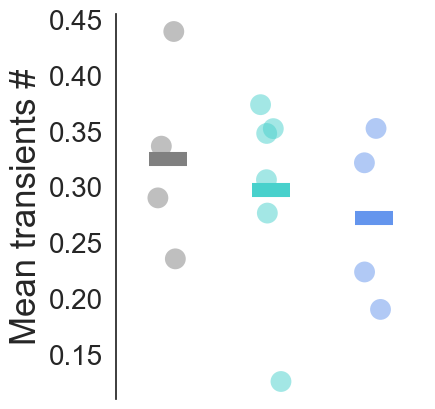

In [485]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y=data_str, data=df, hue = 'condition', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.show()

In [486]:
#mean firing amplitude
#COMPARE TO NOT AT SPIKES, IS IT BASAL VS SPIKE ONLY, LOOK AT ABSOLUTE VALUES TOO? 

from scipy import stats
data_str = 'event amplitude'
data1 = df[df['condition'] == 'FOXG1++'][data_str]
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

data2 = df[df['condition'] == 'FOXG1+-'][data_str]
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

data3 = df[df['condition'] == 'FOXG1--'][data_str]
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

9.58668745258016 1.3998286194888099
9.388320346249337 1.004141487402784
7.09841160884538 0.35425279327455594


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', pale

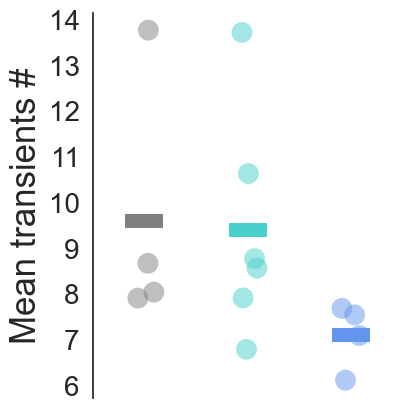

In [487]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y=data_str, data=df, hue = 'condition', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.show()

In [488]:
#transient duration
#smoothe out?


from scipy import stats
data_str = 'event duration'
data1 = df[df['condition'] == 'FOXG1++'][data_str]
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

data2 = df[df['condition'] == 'FOXG1+-'][data_str]
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

data3 = df[df['condition'] == 'FOXG1--'][data_str]
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1.4883625592427667 0.04405733767563988
1.425526260172188 0.051424410596713335
1.3645836008388346 0.08105908186661405


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', pale

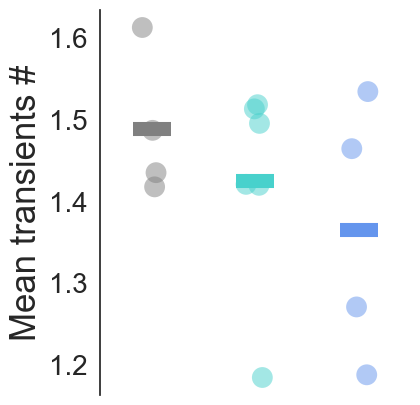

In [489]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y=data_str, data=df, hue = 'condition', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.show()

In [493]:
#long/short range pairwise correlation -> remove low values!!!

#transient duration
from scipy import stats
data_str = 's_corr'
data1 = df[df['condition'] == 'FOXG1++'][data_str]
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

data2 = df[df['condition'] == 'FOXG1+-'][data_str]
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

data3 = df[df['condition'] == 'FOXG1--'][data_str]
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

0.06238977059349283 0.013756376817766897
0.04906594861885371 0.0045452486640750285
0.06532694331051776 0.015689755173609213


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', pale

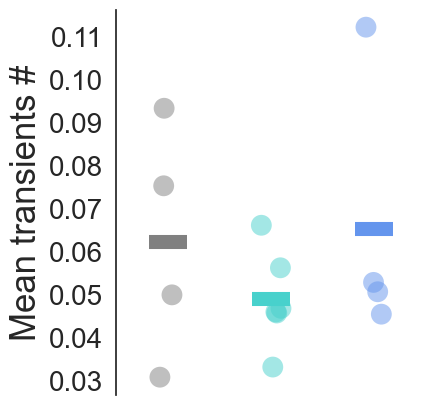

In [494]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y=data_str, data=df, hue = 'condition', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.show()

In [495]:
#dimensionality

from scipy import stats
data_str = 'dim'
data1 = df[df['condition'] == 'FOXG1++'][data_str]
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

data2 = df[df['condition'] == 'FOXG1+-'][data_str]
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

data3 = df[df['condition'] == 'FOXG1--'][data_str]
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

73.31072993916837 29.98248158802801
70.8208100039163 15.202940691840299
55.20950723968884 14.470659665070052


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/2844541062.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', pale

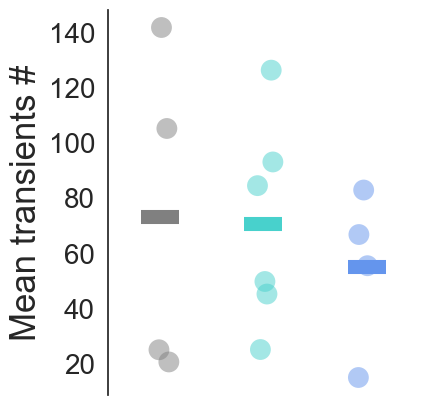

In [496]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="condition", y=data_str, data = df, hue = 'condition', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y=data_str, data=df, hue = 'condition', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.show()

# Single cell properties - PTZ


# Process data

In [296]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*BLNLIGHT_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*BLNLIGHT_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*BLNLIGHT_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*BLNLIGHT_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6d

In [37]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*PTZ*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*PTZ*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*PTZ*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*PTZ*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*PTZ*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*PTZ*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*PTZ*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'B

In [38]:
ll = np.concatenate((wt_reg_bind, het_reg_bind, hom_reg_bind))
for l in ll:
    print(np.load(l).shape)

(11079, 9828)
(14169, 9828)
(14163, 9828)
(13142, 9828)
(15127, 9828)
(14673, 11521)
(13983, 9828)
(13197, 9828)
(11791, 9828)
(10151, 9828)
(10544, 9828)
(16619, 9828)
(10547, 9828)


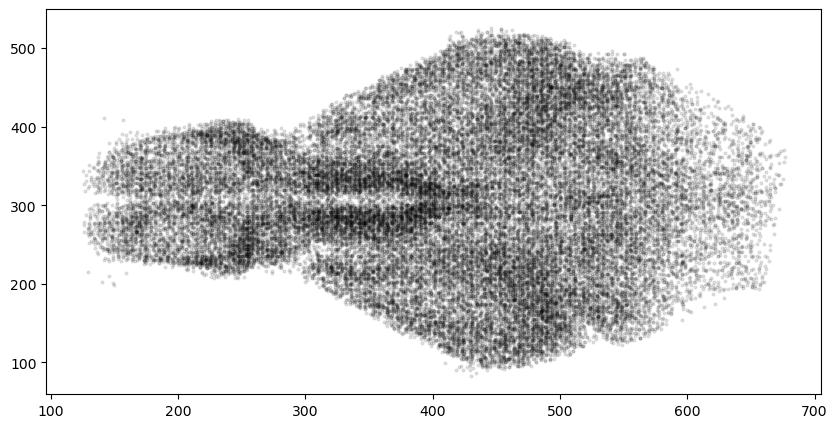

In [103]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = het_lab_coord
trace_ch = het_reg_deltaff

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(trace_ch[i])], 'inbrain')
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 4, c = 'k', alpha = 0.1)
plt.show()

In [9]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
i=0
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))
trace, bind, coord = tfn.select_region( np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Subpallium')


## SPONTANEOUS

In [ ]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'all')

    # spikes, mean_amp, n_trans, mean_transdur, corr, dimen = spike_stats(bind, trace)
    

    # wt_spikes[i] =spikes
    # wt_amp[i] = mean_amp
    # wt_n_trans[i] = n_trans
    # wt_mean_transdur[i] = mean_transdur
    # wt_corr[i] = corr
    # wt_dim[i] = dimen
    # print(i)
    print(trace.shape)
    

In [ ]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'all')

    print(trace.shape)

In [358]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
p_spike_df = pd.read_csv(path+'foxg1_spike.csv')
p_spike_df

EmptyDataError: No columns to parse from file

In [136]:

from scipy import stats
data1 = p_spike_df["mean spike count per neuron"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["mean spike count per neuron"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["mean spike count per neuron"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1119.7412077690005 131.28930931395078
1126.7499960664231 121.61398669044105
179.44141520279086 25.39163880562224


In [101]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 11.0   p = 0.2222222222222222
U = 19.0   p = 0.2222222222222222


In [149]:

import scipy.stats as stats

# Function to check normality and choose the appropriate test
def compare_data(data1, data2, alpha):
    # Check normality using Shapiro-Wilk test
    normal1 = stats.shapiro(data1)[1] > alpha
    normal2 = stats.shapiro(data2)[1] > alpha
    
    print(f"Normality test for data1: {'Normal' if normal1 else 'Not normal'}")
    print(f"Normality test for data2: {'Normal' if normal2 else 'Not normal'}")
    
    # If both datasets are normal, use t-test
    if normal1 and normal2:
        t_stat, p_value = stats.ttest_ind(data1, data2)
        print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')
    else:
        # If any dataset is not normal, use Mann-Whitney U test
        U, p_value = stats.mannwhitneyu(data1, data2)
        print(f'Mann-Whitney U test: U = {U}, p-value = {p_value}')
    
    # Compare p-value with the significance level
    if p_value < alpha:
        print(f"Result: Significant (p < {alpha})")
    else:
        print(f"Result: Not significant (p >= {alpha})")

# Set significance level after Bonferroni correction
alpha=0.05
# Perform comparisons for data1 vs data2, and data1 vs data3
print('Comparison: data1 vs data2')
compare_data(data1, data2, alpha)

print('\nComparison: data1 vs data3')
compare_data(data1, data3, alpha)


Comparison: data1 vs data2
Normality test for data1: Normal
Normality test for data2: Normal
T-test: t-statistic = -0.035692924241060825, p-value = 0.97222965391263
Result: Not significant (p >= 0.05)

Comparison: data1 vs data3
Normality test for data1: Normal
Normality test for data2: Normal
T-test: t-statistic = -3.441079711737575, p-value = 0.010821339434708768
Result: Significant (p < 0.05)


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3108146800.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="dimensionality", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3108146800.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="dimensionality", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3108146800.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="dimensionality", data = p_

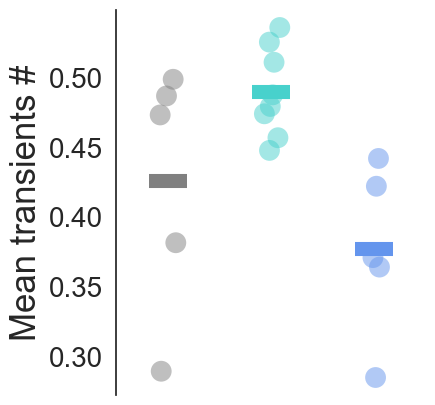

In [104]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="dimensionality", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="dimensionality", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [138]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
p_spike_df = pd.read_csv(path+'foxg1_spike.csv')
p_spike_df=pd.concat((p_spike_df[:3],p_spike_df[4:]))

In [139]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
ptz_spike_df = pd.read_csv(path+'foxg1_spikes_ptz.csv')
ptz_spike_df

mean spikes per neuron - PTZ Labels
0                    1574.898868     WT
1                    1031.753230     WT
2                     976.944637     WT
3                    1496.602287     WT
4                    1076.691617    HET
5                    1357.050154    HET
6                    1283.942222    HET
7                    1793.956094    HET
8                    1323.264432    HET
9                    1522.631702    HET
10                    617.335290    HET
11                   1923.242881    HET
12                    986.753788    HOM
13                   1199.359244    HOM
14                   1433.165787    HOM
15                   1851.322889    HOM
16                    607.667105    HOM

In [140]:
p_spike_df['lfc'] = np.log2(ptz_spike_df['mean spikes per neuron - PTZ'].values/p_spike_df['mean spike count per neuron'].values)

/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette

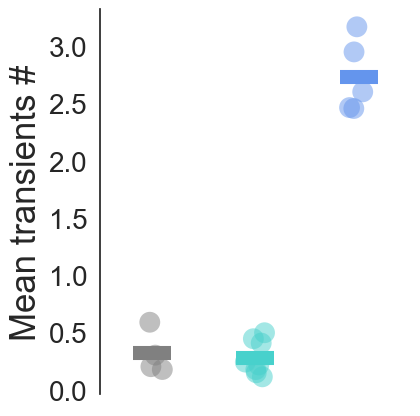

In [15]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="lfc", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [141]:
from scipy import stats
data1 = p_spike_df["lfc"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

0.3196387184035538 0.09464953543900026
0.2829057561388077 0.052224152061719306
2.7300197959627774 0.14204983772998164


In [18]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 19.0   p = 0.6828282828282828
U = 0.0   p = 0.015873015873015872


In [144]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
p_spike_df = pd.read_csv(path+'foxg1_amplitude.csv')
p_spike_df=pd.concat((p_spike_df[:3],p_spike_df[4:]))
p_spike_df

mean fluorescence per neuron Labels
0                       6.528919     WT
1                       7.140035     WT
2                       8.878517     WT
4                       6.790088     WT
5                       6.749306    HET
6                       7.073435    HET
7                       5.999554    HET
8                       7.419044    HET
9                       8.280692    HET
10                      6.380633    HET
11                      8.602897    HET
12                      4.913912    HET
13                      4.077258    HOM
14                      4.198977    HOM
15                      5.303938    HOM
16                      3.959185    HOM
17                      4.945045    HOM

In [145]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
ptz_spike_df = pd.read_csv(path+'foxg1_amplitude_ptz.csv')
ptz_spike_df

mean fluorescence per neuron - PTZ Labels
0                             6.390085     WT
1                             7.743942     WT
2                             7.878058     WT
3                             7.149753     WT
4                             7.542465    HET
5                             7.465558    HET
6                             5.765892    HET
7                             7.192795    HET
8                             7.543114    HET
9                             6.853876    HET
10                            7.922755    HET
11                            4.948798    HET
12                            6.420252    HOM
13                            4.765289    HOM
14                            6.316029    HOM
15                            5.673614    HOM
16                            6.243289    HOM

In [147]:
p_spike_df['lfc'] = np.log2(ptz_spike_df['mean fluorescence per neuron - PTZ'].values/p_spike_df['mean fluorescence per neuron'].values)

In [26]:
point = np.zeros((18))

p_spike_df = {}
count=0
choose = 0

data = [wt_spikes, het_spikes, hom_spikes]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i][choose])
        count+=1

p_spike_df = pd.DataFrame({"mean spike count per neuron":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3268379941.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette

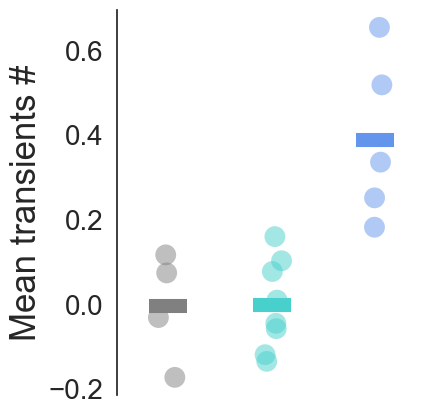

In [25]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="lfc", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="lfc", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [148]:
from scipy import stats
data1 = p_spike_df["lfc"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["lfc"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

-0.0029718969243124546 0.06451160412215613
-0.0004801014226791106 0.03780232650575753
0.38897951751975973 0.0871427937056633


In [27]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 16.0   p = 1.0
U = 0.0   p = 0.015873015873015872


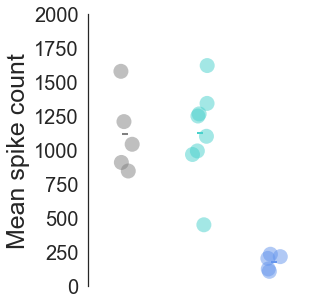

In [58]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="mean spike count per neuron", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="mean spike count per neuron", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean spike count', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_spikes.svg', transparent = True)
plt.show()

In [10]:
from scipy import stats
data1 = p_spike_df['mean spike count per neuron'][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df['mean spike count per neuron'][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df['mean spike count per neuron'][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1119.7412077690005 131.28930931395078
1126.7499960664231 121.61398669044105
179.44141520279086 25.39163880562224


In [11]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 16.0   p = 0.30420390011649917
U = 0.0   p = 0.006092890177672406


In [19]:
from scipy import stats
data1 = p_spike_df["mean spikes per neuron - PTZ"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["mean spikes per neuron - PTZ"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["mean spikes per neuron - PTZ"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1270.0497555692725 154.63798477766147
1362.2642989641738 144.60080451694637
1215.653762508231 209.0089955200502


In [20]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 13.0   p = 0.3355627291949064
U = 9.0   p = 0.4512616250888397


In [54]:
amp_df = pd.read_csv('foxg1_amplitude_PTZ.csv')
amp_df

mean fluorescence per neuron - PTZ Labels
0                             6.390085     WT
1                             7.743942     WT
2                             7.878058     WT
3                             7.149753     WT
4                             7.542465    HET
5                             7.465558    HET
6                             5.765892    HET
7                             7.192795    HET
8                             7.543114    HET
9                             6.853876    HET
10                            7.922755    HET
11                            4.948798    HET
12                            6.420252    HOM
13                            4.765289    HOM
14                            6.316029    HOM
15                            5.673614    HOM
16                            6.243289    HOM

In [68]:
point = np.zeros((18))

amp_df = {}
count=0
choose = 0
data = [wt_amp, het_amp, hom_amp]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i][choose])
        count+=1

amp_df = pd.DataFrame({"mean fluorescence per neuron":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

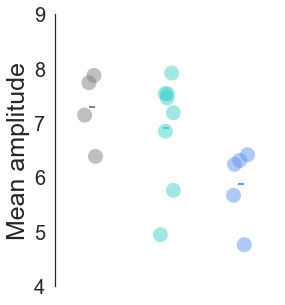

In [56]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="mean fluorescence per neuron - PTZ", data = amp_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="mean fluorescence per neuron - PTZ", data=amp_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean amplitude', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 9, bottom = 4)
plt.savefig(Ffig + 'foxg1_amp_PTZ.svg', transparent = True)
plt.show()

In [28]:
from scipy import stats
data1 = amp_df["mean fluorescence per neuron - PTZ"][amp_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = amp_df["mean fluorescence per neuron - PTZ"][amp_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = amp_df["mean fluorescence per neuron - PTZ"][amp_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

7.2904593748345725 0.3392872993814923
6.90440664084281 0.3628589983442974
5.883694630884653 0.3081460936138665


In [29]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 13.0   p = 0.3355627291949064
U = 1.0   p = 0.01866820796033144


In [81]:
point = np.zeros((18))

amp_df = {}
count=0
choose = 0
data = [wt_n_trans, het_n_trans, hom_n_trans]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i][choose])
        count+=1

ntrans_df = pd.DataFrame({"n trans":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

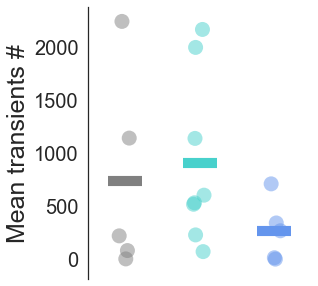

In [83]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="n trans", data = ntrans_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="n trans", data=ntrans_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [84]:
from scipy import stats
data1 = ntrans_df["n trans"][ntrans_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = ntrans_df["n trans"][ntrans_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = ntrans_df["n trans"][ntrans_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

739.4 429.55961169551307
909.375 280.2854372586733
267.0 130.2796991092626


In [85]:

#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 16.0   p = 0.30420390011649917
U = 10.0   p = 0.33805165701157347


In [37]:
transdur_df = pd.read_csv('foxg1_transient_duration_PTZ.csv')
transdur_df

data Labels
0   1.382551     WT
1   1.206243     WT
2   1.217687     WT
3   1.359289     WT
4   1.232931    HET
5   1.303909    HET
6   1.261020    HET
7   1.371735    HET
8   1.295311    HET
9   1.375033    HET
10  1.107741    HET
11  1.514307    HET
12  1.165794    HOM
13  1.240942    HOM
14  1.313766    HOM
15  1.489523    HOM
16  1.073186    HOM

In [90]:
point = np.zeros((18))

amp_df = {}
count=0
choose = 0
data = [wt_mean_transdur, het_mean_transdur, hom_mean_transdur]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i][choose])/2.73
        count+=1

transdur_df = pd.DataFrame({"transdur":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

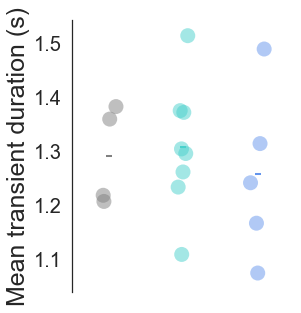

In [38]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="data", data = transdur_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=transdur_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transient duration (s)', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'foxg1_transdur_PTZ.svg', transparent = True)
plt.show()

In [40]:
from scipy import stats
data1 = transdur_df["data"][transdur_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = transdur_df["data"][transdur_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = transdur_df["data"][transdur_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1.2914425620335375 0.046190448054030754
1.307748153759799 0.042097139993585435
1.2566421227277904 0.07058775410284358


In [41]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 14.0   p = 0.3994533348216349
U = 8.0   p = 0.3566515869392288


In [64]:
corr_df = pd.read_csv('foxg1_correlation.csv')
corr_df

mean pairwise correlation Labels
0                    0.003684     WT
1                    0.003620     WT
2                    0.004944     WT
3                    0.003125     WT
4                    0.003756     WT
5                    0.003763    HET
6                    0.002422    HET
7                    0.002851    HET
8                    0.002673    HET
9                    0.002992    HET
10                   0.002246    HET
11                   0.004963    HET
12                   0.004449    HET
13                   0.001416    HOM
14                   0.006492    HOM
15                   0.004798    HOM
16                   0.005795    HOM
17                   0.002366    HOM

In [49]:
point = np.zeros((18))
choose= 0
count=0

data = [wt_corr, het_corr, hom_corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i][choose])
        count+=1

corr_df = pd.DataFrame({"Pallium mean pairwise correlation":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

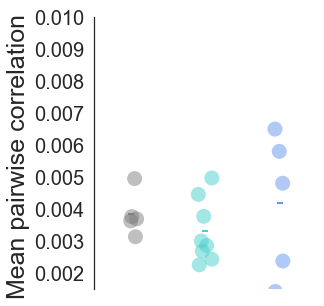

In [65]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="mean pairwise correlation", data = corr_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="mean pairwise correlation", data=corr_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean pairwise correlation ', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 0.010, bottom = 0.0015)

plt.savefig(Ffig + 'foxg1_corr.svg', transparent = True)
plt.show()

In [51]:
from scipy import stats
data1 = corr_df["mean pairwise correlation - PTZ"][corr_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = corr_df["mean pairwise correlation - PTZ"][corr_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = corr_df["mean pairwise correlation - PTZ"][corr_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

0.00320693992814485 0.0005386046548831219
0.00446291442865775 0.0002701495454932791
0.00604071902424712 0.0012579660730787712


In [52]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(data1, data2)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(data1, data3)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 5.0   p = 0.03726578552730971
U = 3.0   p = 0.055673443266570206


In [55]:
from scipy import stats
wt_corr = corr_df[corr_df['Labels'] == 'WT']
het_corr = corr_df[corr_df['Labels'] == 'HET']
hom_corr = corr_df[corr_df['Labels'] == 'HOM']

#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_corr['Subpallium mean pairwise correlation'], het_corr['Subpallium mean pairwise correlation'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 1.5524160031930803   p = 0.14884220370127407
Samples are the same


In [68]:
point = np.zeros((18))

count=0

data = [wt_corr, het_corr, hom_corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i])
        count+=1

corr_df = pd.DataFrame({"mean pairwise correlation":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [68]:
point = np.zeros((18))

count=0
choose = 0
data = [wt_dim, het_dim, hom_dim]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i][choose]
        count+=1

dim_df = pd.DataFrame({"Pallium dimensionality":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

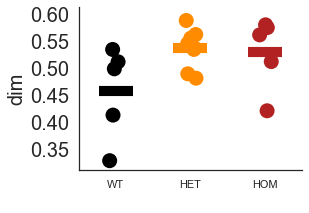

In [69]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="Pallium dimensionality", data = dim_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Pallium dimensionality", data=dim_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dim', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [71]:
wt_dim = dim_df[dim_df['Labels'] == 'WT']
het_dim = dim_df[dim_df['Labels'] == 'HET']
hom_dim = dim_df[dim_df['Labels'] == 'HOM']

#BLN - PTZ20
alpha = 0.05

t, p = stats.ttest_ind(wt_dim['Pallium dimensionality'], het_dim['Pallium dimensionality'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -2.364841218173482   p = 0.03749196879426136
Samples are significantly different


## PTZ02

In [187]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*BLNLIGHT_*labcoord.npy*'))[1:]
het_reg_deltaff = sorted(glob.glob('*1+-*BLNLIGHT_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*BLNLIGHT_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*BLNLIGHT_*labcoord.npy*'))
hom_reg_deltaff = list(np.append(sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))[0],sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))[2:]))
hom_reg_bind = list(np.append(sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))[0],sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))[2:]))
#wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

In [179]:
#PTZ02
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = sorted(glob.glob('*++*PTZ02_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*PTZ02_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*PTZ02_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*PTZ02_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*PTZ02_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*PTZ02_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ02_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ02_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*PTZ02_*regbinarised.npy*'))
#wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind
hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy

In [ ]:
    
#================================================
def select_region(trace, dff, bind, coord, region):
#================================================
    
    """
    This function slices data to include only those within a specific brain region.

    Inputs:
        trace (np array): cells x timepoints, raw fluorescence values
        dff (np array): cells x timepoints, normalised fluorescence
        bind (np array): cells x time, binarised state vector
        coord (np array): cells x XYZ coordinates and labels
        region (str): 'all', 'Diencephalon', 'Midbrain', 'Hindbrain' or 'Telencephalon'
    
    Returns:
        sub_trace (np array): cells x timepoints, raw or normalised fluorescence values for subregion
        sub_bind (np array): cells x time, binarised state vector for subregion
        sub_coord (np array): cells x XYZ coordinates for subregion
    
    
    """
    
    import numpy as np

    if coord.shape[0] != trace.shape[0]:
        print('Trace and coordinate data not same shape')
        return()


    if region == 'all':
        locs = np.where(coord[:,4] != 'nan')

    else: 
        locs = np.where(coord[:,4] == region)

    sub_coord = coord[locs][:,:3].astype(float)
    sub_trace, sub_dff, sub_bind = trace[locs], dff[locs], bind[locs]


    return(sub_trace, sub_dff, sub_bind, sub_coord)


In [172]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind
time = 9828
#wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    #trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    print(dff_ch[i])
    print(np.load(dff_ch[i])[:,:time].shape)
    print(bind_ch[i])
    print(np.load(bind_ch[i])[:,:time].shape)
    print(coord_ch[i])
    print(np.load(coord_ch[i])[:,:time].shape)
    #tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')

    #spikes, mean_amp, n_trans, mean_transdur, corr, dimen = spike_stats(bind, trace)
    

    # wt_spikes[i] =spikes
    # wt_amp[i] = mean_amp
    # wt_n_trans[i] = n_trans
    # wt_mean_transdur[i] = mean_transdur
    # wt_corr[i] = corr
    # wt_dim[i] = dimen
    # print(i)
    # print(trace.shape)
    

BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy
(10030, 9828)
BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy
(10030, 9828)
BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy
(10030, 5)
BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy
(10742, 9828)
BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy
(10742, 9828)
BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy
(10422, 5)
BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy
(10422, 9828)
BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy
(10422, 9828)
BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy
(16020, 5)
BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy
(16020, 9828)
BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy
(16020, 9828)
BLNLIGHTPTZ-FOXG1---06_2phot

In [169]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind
time = 9828
#wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    #trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')

    #spikes, mean_amp, n_trans, mean_transdur, corr, dimen = spike_stats(bind, trace)
    

    # wt_spikes[i] =spikes
    # wt_amp[i] = mean_amp
    # wt_n_trans[i] = n_trans
    # wt_mean_transdur[i] = mean_transdur
    # wt_corr[i] = corr
    # wt_dim[i] = dimen
    print(i)
    print(trace.shape)
    

0
(1089, 9828)
Trace and coordinate data not same shape


ValueError: not enough values to unpack (expected 4, got 0)

In [94]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
time = 9828
wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur, wt_corr, wt_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = mafn.spike_stats(trace[1], trace[0])
    wt_spikes[i] = spikes
    wt_amp[i] = mean_amp
    wt_n_trans[i] = n_trans
    wt_mean_transdur[i] = mean_transdur 
    wt_corr[i] = corr
    wt_dim[i] = dimen
    print(i)
    

0
1
2
3


In [138]:
het_lab_coord, het_reg_deltaff, het_reg_bind

(['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ

In [95]:
coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind
het_spikes, het_amp, het_n_trans, het_mean_transdur, het_corr, het_dim =  list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = mafn.spike_stats(trace[1], trace[0])
    het_spikes[i] = spikes
    het_amp[i] = mean_amp
    het_n_trans[i] = n_trans
    het_mean_transdur[i] = mean_transdur 
    het_corr[i] = corr
    het_dim[i] = dimen
    print(i)

0
1
2
3
4
5
6
7


In [139]:
hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
 

In [96]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind
hom_spikes, hom_amp, hom_n_trans, hom_mean_transdur, hom_corr, hom_dim = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur, corr, dimen = mafn.spike_stats(trace[1], trace[0])
    hom_spikes[i] = spikes
    hom_amp[i] = mean_amp
    hom_n_trans[i] = n_trans
    hom_mean_transdur[i] = mean_transdur 
    hom_corr[i] = corr
    hom_dim[i] = dimen
    print(i)

0
1
2
3
4


In [258]:
len(wt_lab_coord), len(het_lab_coord), len(hom_lab_coord)

(4, 8, 5)

In [98]:
point = np.zeros((17))

spike_df = {}
count=0

data = [wt_spikes, het_spikes, hom_spikes]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i])
        count+=1

spike_df = pd.DataFrame({"mean spikes per neuron - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [100]:
spike_df.to_csv('foxg1_spikes_PTZ.csv',index=False)

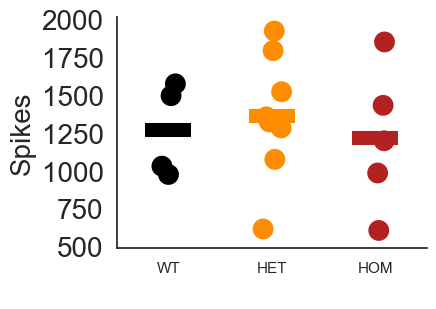

In [298]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Spikes', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [70]:
wt_spike = spike_df[spike_df['Labels'] == 'WT']
het_spike = spike_df[spike_df['Labels'] == 'HET']
hom_spike = spike_df[spike_df['Labels'] == 'HOM']

In [71]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_spike['data'], het_spike['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.3284269325550995   p = 0.748756019429677
Samples are the same


In [73]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_spike['data'], hom_spike['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.4766035096103938   p = 0.6463904553091148
Samples are the same


In [102]:
point = np.zeros((17))

amp_df = {}
count=0

data = [wt_amp, het_amp, hom_amp]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i])
        count+=1

amp_df = pd.DataFrame({"mean fluorescence per neuron - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [103]:
amp_df

mean fluorescence per neuron - PTZ Labels
0                             6.390085     WT
1                             7.743942     WT
2                             7.878058     WT
3                             7.149753     WT
4                             7.542465    HET
5                             7.465558    HET
6                             5.765892    HET
7                             7.192795    HET
8                             7.543114    HET
9                             6.853876    HET
10                            7.922755    HET
11                            4.948798    HET
12                            6.420252    HOM
13                            4.765289    HOM
14                            6.316029    HOM
15                            5.673614    HOM
16                            6.243289    HOM

In [104]:
amp_df.to_csv('foxg1_amplitude_PTZ.csv',index=False)

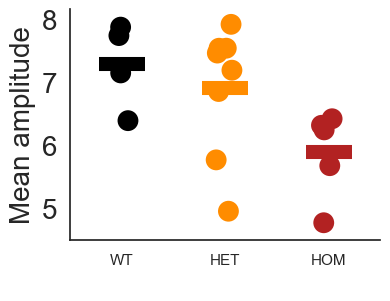

In [300]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = amp_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=amp_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean amplitude', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [149]:
wt_amps = amp_df[amp_df['Labels'] == 'WT']
het_amps = amp_df[amp_df['Labels'] == 'HET']
hom_amps = amp_df[amp_df['Labels'] == 'HOM']

In [151]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_amps['data'], het_amps['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 1.152517979002994   p = 0.2735396219092233
Samples are the same


In [152]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_ind(wt_amps['data'], hom_amps['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 2.2602515399402527   p = 0.05370127930764889
Samples are the same


In [270]:
point = np.zeros((17))

amp_df = {}
count=0

data = [wt_n_trans, het_n_trans, hom_n_trans]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.mean(data[e][i])
        count+=1

ntrans_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

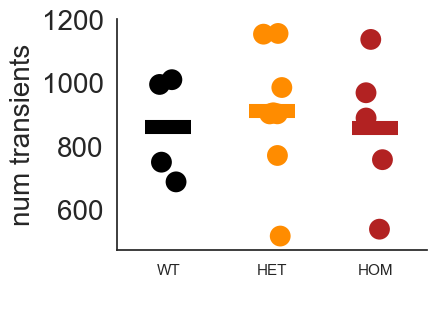

In [271]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = ntrans_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=ntrans_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('num transients', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [105]:
point = np.zeros((17))

amp_df = {}
count=0

data = [wt_mean_transdur, het_mean_transdur, hom_mean_transdur]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i])
        count+=1

transdur_df = pd.DataFrame({"mean transient duration per neuron - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [106]:
transdur_df.to_csv('foxg1_transient_duration_PTZ.csv',index=False)

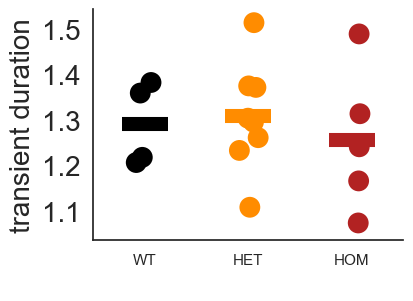

In [273]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = transdur_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=transdur_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('transient duration', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [90]:
len(data[0])

5

In [110]:
point = np.zeros((17))

count=0

data = [wt_corr, het_corr, hom_corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = np.nanmean(data[e][i])
        count+=1

corr_df = pd.DataFrame({"mean pairwise correlation - PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [112]:
corr_df.to_csv('foxg1_correlation_PTZ.csv',index=False)

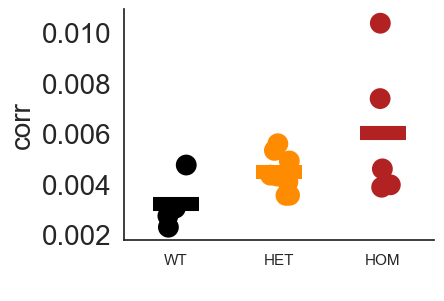

In [108]:

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = corr_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=corr_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('corr', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [109]:
wt_corrs = corr_df[corr_df['Labels'] == 'WT']
het_corrs = corr_df[corr_df['Labels'] == 'HET']
hom_corrs = corr_df[corr_df['Labels'] == 'HOM']

#BLN - PTZ20
alpha = 0.05

t, p = stats.ttest_ind(wt_corrs['data'], het_corrs['data'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -2.3576146053291676   p = 0.040116182319331985
Samples are significantly different


In [114]:
point = np.zeros((17))

count=0

data = [wt_dim, het_dim, hom_dim]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

dim_df = pd.DataFrame({"dimensionality PTZ":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


In [115]:
dim_df.to_csv('foxg1_dim_PTZ.csv',index=False)

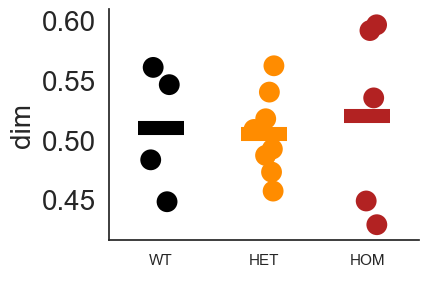

In [283]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = dim_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=dim_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dim', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

In [316]:
point = np.zeros((17))

count=0

data = [wt_list, het_list, hom_list]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

corr_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


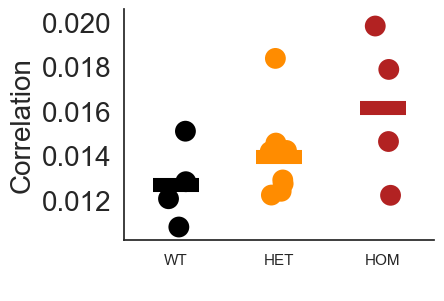

In [317]:


from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="data", data = corr_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=corr_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Correlation', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.show()

# Network stuff


In [404]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

wt_lab_coord = list(np.append(sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*')) [0], sorted(glob.glob('*++*BLNLIGHT_*labcoord.npy*'))[2:]))
wt_reg_deltaff = list(np.append(sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))[0], sorted(glob.glob('*++*BLNLIGHT_*regdeltaff.npy*'))[2:]))
wt_reg_bind = list(np.append(sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))[0], sorted(glob.glob('*++*BLNLIGHT_*regbinarised.npy*'))[2:]))

het_lab_coord = sorted(glob.glob('*1+-*BLNLIGHT_*labcoord.npy*'))[1:]
het_reg_deltaff = sorted(glob.glob('*1+-*BLNLIGHT_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*BLNLIGHT_*regbinarised.npy*'))[1:]

hom_lab_coord = sorted(glob.glob('*1---*BLNLIGHT_*labcoord.npy*'))
hom_reg_deltaff = list(np.append(sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))[0],sorted(glob.glob('*1---*BLNLIGHT_*regdeltaff.npy*'))[2:]))
hom_reg_bind = list(np.append(sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))[0],sorted(glob.glob('*1---*BLNLIGHT_*regbinarised.npy*'))[2:]))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind
#het_lab_coord, het_reg_deltaff, het_reg_bind
#hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regbinarised.npy'])

In [405]:
def select_cell_trace(lab_coord, trace_list, mode):
    #sub select cells and traces according to brain region
    import numpy as np
    if mode == 'inbrain':
        locs = np.where(lab_coord[:,4] != 'nan')
        
    else: 
        locs = np.where(lab_coord[:,4] == mode)
            
    sub_coord = lab_coord[locs][:,:4]
                                      
    sub_trace_list = list(range(len(trace_list)))
    for i in range(len(sub_trace_list)):
        if lab_coord.shape[0] != trace_list[i].shape[0]:
            print('Trace and coordinate data not same shape')
            break 
        sub_trace_list[i] = trace_list[i][locs]
    return(sub_coord, sub_trace_list)


def dim(data):
    import numpy as np
    cov = np.cov(data)
    eig = np.linalg.eigvals(cov)
    output = (((np.sum(eig))**2)/ (np.sum(eig**2))) / eig.shape[0]
    return(output)

def spike_stats(bind, dff):
    # calculate spike statistics - number of spikes per cell, mean amplitude per cell, number of continuous transients per cell, mean transient duration per cell
    import numpy as np
    import more_itertools as mit
    if bind.shape[0] != dff.shape[0]:
        print('Data not the same shape')
        return()
    spikes = np.sum(bind, axis = 1)
    mean_amp = np.mean(dff, axis = 1)
    n_trans = np.zeros((bind.shape[0]))
    corr = np.corrcoef(bind)
    for i in range(bind.shape[0]):
        si = np.where(bind[i] == 1)[0]
        n_trans[i] = len([list(group) for group in mit.consecutive_groups(si)])
    mean_transdur = spikes / n_trans
    dimen = dim(bind)
    return(spikes, mean_amp, n_trans, mean_transdur, corr, dimen)

In [345]:
#PTZ02
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdata  + experiment)
import glob

# wt_lab_coord = sorted(glob.glob('*++*PTZ*labcoord.npy*')) 
# wt_reg_deltaff = sorted(glob.glob('*++*PTZ*regdeltaff.npy*'))
# wt_reg_bind = sorted(glob.glob('*++*PTZ*regbinarised.npy*'))

het_lab_coord = list(np.append(sorted(glob.glob('*1+-*PTZ*labcoord.npy*'))[:2] , sorted(glob.glob('*1+-*PTZ*labcoord.npy*'))[3:]))
het_reg_deltaff = list(np.append(sorted(glob.glob('*1+-*PTZ*regdeltaff.npy*'))[:2] , sorted(glob.glob('*1+-*PTZ*labcoord.npy*'))[3:]))
het_reg_bind = sorted(glob.glob('*1+-*PTZ*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ*labcoord.npy*'))[1:] 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ*regdeltaff.npy*'))[2:]
hom_reg_bind = sorted(glob.glob('*1---*PTZ*regbinarised.npy*'))[1:]
#wt_lab_coord, wt_reg_deltaff, wt_reg_bind
#het_lab_coord, het_reg_deltaff, het_reg_bind
hom_lab_coord, hom_reg_deltaff, hom_reg_bind

(['BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy'])

In [150]:
path = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
p_spike_df = pd.read_csv(path+'foxg1_cell_number.csv')
p_spike_df = p_spike_df.drop(1)
p_spike_df

from scipy import stats
data1 = p_spike_df["total cell number"][p_spike_df['Labels'] == 'WT']
mean = np.mean(data1)
sem = stats.sem(data1)
print(mean, sem)

from scipy import stats
data2 = p_spike_df["total cell number"][p_spike_df['Labels'] == 'HET']
mean = np.mean(data2)
sem = stats.sem(data2)
print(mean, sem)

from scipy import stats
data3 = p_spike_df["total cell number"][p_spike_df['Labels'] == 'HOM']
mean = np.mean(data3)
sem = stats.sem(data3)
print(mean, sem)

1644.5 90.79509898667439
1340.375 87.59320291226123
1053.4 224.11082080078148


In [151]:


#cell number
import scipy.stats as stats

# Function to check normality and choose the appropriate test
def compare_data(data1, data2, alpha):
    # Check normality using Shapiro-Wilk test
    normal1 = stats.shapiro(data1)[1] > alpha
    normal2 = stats.shapiro(data2)[1] > alpha
    
    print(f"Normality test for data1: {'Normal' if normal1 else 'Not normal'}")
    print(f"Normality test for data2: {'Normal' if normal2 else 'Not normal'}")
    
    # If both datasets are normal, use t-test
    if normal1 and normal2:
        t_stat, p_value = stats.ttest_ind(data1, data2)
        print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')
    else:
        # If any dataset is not normal, use Mann-Whitney U test
        U, p_value = stats.mannwhitneyu(data1, data2)
        print(f'Mann-Whitney U test: U = {U}, p-value = {p_value}')
    
    # Compare p-value with the significance level
    if p_value < alpha:
        print(f"Result: Significant (p < {alpha})")
    else:
        print(f"Result: Not significant (p >= {alpha})")

# Set significance level after Bonferroni correction
alpha=0.05
# Perform comparisons for data1 vs data2, and data1 vs data3
print('Comparison: data1 vs data2')
compare_data(data1, data2, alpha)

print('\nComparison: data1 vs data3')
compare_data(data1, data3, alpha)

Comparison: data1 vs data2
Normality test for data1: Normal
Normality test for data2: Normal
T-test: t-statistic = 2.1601180148776415, p-value = 0.056098358218804184
Result: Not significant (p >= 0.05)

Comparison: data1 vs data3
Normality test for data1: Normal
Normality test for data2: Normal
T-test: t-statistic = 2.2193700197474686, p-value = 0.06193481056032113
Result: Not significant (p >= 0.05)


/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3840640285.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="total cell number", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3840640285.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="total cell number", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_46541/3840640285.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="total cell number", 

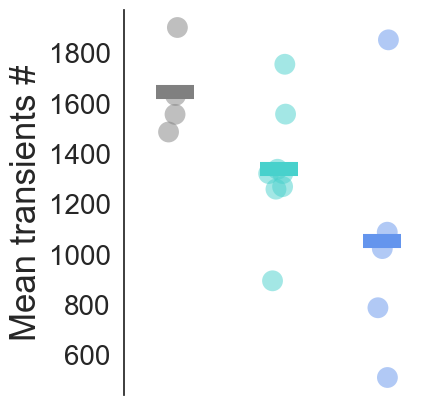

In [95]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="total cell number", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="total cell number", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [197]:
coord_ch,dff_ch,bind_ch

(['BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regdeltaff.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy',
  'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_regbinarised.npy

In [316]:
bind.shape

(1632, 9828)

In [318]:
np.sum(bind)/bind.shape[0]

1211.9448529411766

In [397]:
%autoreload
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,0.4))

spike_l, name_l, cond_l = [],[],[]

ax=0
coord_ch= hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind
print('hom')
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    print(trace.shape)

    spikes =np.mean(dff[bind == 1])
    spike_l.append(spikes)
    cond_l.append('HOM')
    name_l.append(dff_ch[i][:dff_ch[i].find('2photon')-1])

coord_ch= het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind
print('het')
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    print(trace.shape)

    spikes =np.mean(dff[bind == 1])
    spike_l.append(spikes)
    cond_l.append('HET')
    name_l.append(dff_ch[i][:dff_ch[i].find('2photon')-1])


coord_ch= wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
print('wt')
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    print(trace.shape)

    spikes = np.mean(dff[bind == 1])
    spike_l.append(spikes)
    cond_l.append('WT')
    name_l.append(dff_ch[i][:dff_ch[i].find('2photon')-1])

hom
(1089, 9828)
(1024, 9828)
(1853, 9828)
(789, 9828)
het
(1339, 9828)
(896, 9828)
(1322, 9828)
(1558, 9828)
(1322, 9828)
(1260, 9828)
wt
(1487, 9828)
(1557, 9828)
(1902, 9828)
(1632, 9828)


In [393]:
np.unique(np.ravel(bind))

array([0., 1.])

In [398]:
df = pd.DataFrame({'n_spikes': spike_l, 'name': name_l, 'condition': cond_l})
df

n_spikes                    name condition
0    6.105904  BLNLIGHTPTZ-FOXG1---02       HOM
1    7.532995  BLNLIGHTPTZ-FOXG1---04       HOM
2    7.674329  BLNLIGHTPTZ-FOXG1---05       HOM
3    7.080418  BLNLIGHTPTZ-FOXG1---06       HOM
4    8.762197  BLNLIGHTPTZ-FOXG1+--03       HET
5    6.780268  BLNLIGHTPTZ-FOXG1+--04       HET
6    8.557177  BLNLIGHTPTZ-FOXG1+--05       HET
7   10.621051  BLNLIGHTPTZ-FOXG1+--06       HET
8    7.903508  BLNLIGHTPTZ-FOXG1+--07       HET
9   13.705720  BLNLIGHTPTZ-FOXG1+--08       HET
10   7.899565  BLNLIGHTPTZ-FOXG1++-01        WT
11  13.756526  BLNLIGHTPTZ-FOXG1++-03        WT
12   8.030399  BLNLIGHTPTZ-FOXG1++-04        WT
13   8.660261  BLNLIGHTPTZ-FOXG1++-05        WT

<Axes: xlabel='condition', ylabel='n_spikes'>

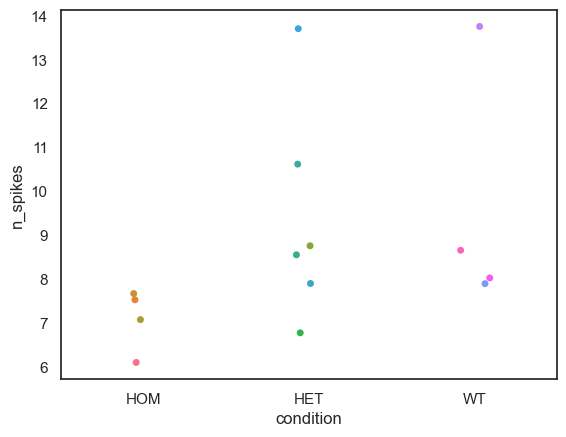

In [399]:
sns.stripplot(data=df, x = 'condition', y = 'n_spikes', hue='name',legend=False)

In [276]:
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,0.4))

coord_ch= hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind

spike_l, name_l, cond_l = [],[],[]

for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    spikes = np.mean(bind,axis=1)
    spike_l.extend(spikes)
    cond_l.extend(np.repeat('HOM', len(spikes)))
    name_l.extend(np.repeat(dff_ch[i][:dff_ch[i].find('2photon')-1],len(spikes)))

    
coord_ch= wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
print('wt')
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    spikes = np.mean(bind,axis=1)
    spike_l.extend(spikes)
    cond_l.extend(np.repeat('WT', len(spikes)))
    name_l.extend(np.repeat(dff_ch[i][:dff_ch[i].find('2photon')-1],len(spikes)))

wt


In [351]:
df = pd.DataFrame({'mean_spikes': spike_l, 'name': name_l, 'condition': cond_l})
df

mean_spikes                    name condition
0      4.897120  BLNLIGHTPTZ-FOXG1---02       HOM
1      6.000088  BLNLIGHTPTZ-FOXG1---04       HOM
2      4.964947  BLNLIGHTPTZ-FOXG1---05       HOM
3      6.400167  BLNLIGHTPTZ-FOXG1---06       HOM
4      7.073435  BLNLIGHTPTZ-FOXG1+--03       HET
5      5.999554  BLNLIGHTPTZ-FOXG1+--04       HET
6      7.419044  BLNLIGHTPTZ-FOXG1+--05       HET
7      8.280692  BLNLIGHTPTZ-FOXG1+--06       HET
8      6.380633  BLNLIGHTPTZ-FOXG1+--07       HET
9      8.602897  BLNLIGHTPTZ-FOXG1+--08       HET
10     6.528919  BLNLIGHTPTZ-FOXG1++-01        WT
11     8.878517  BLNLIGHTPTZ-FOXG1++-03        WT
12     6.334857  BLNLIGHTPTZ-FOXG1++-04        WT
13     6.790088  BLNLIGHTPTZ-FOXG1++-05        WT

In [ ]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (4,5))
ax = sns.pointplot(x="Labels", y="total cell number", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="total cell number", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean transients #', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
plt.savefig(Ffig + 'foxg1_ntrans.svg', transparent = True)
plt.show()

In [377]:
sns.stripplot(data=df, x = 'condition', y = 'mean_spikes', hue='name',legend=False)

ValueError: Could not interpret value `mean_spikes` for `y`. An entry with this name does not appear in `data`.

<Axes: xlabel='condition', ylabel='mean_spikes'>

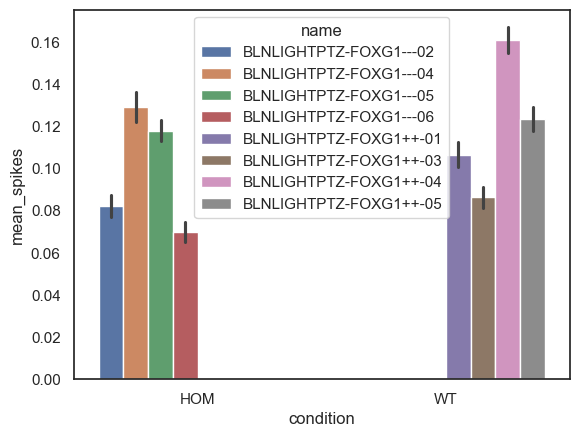

In [279]:
sns.barplot(data=df, x = 'condition', y = 'mean_spikes', hue='name')

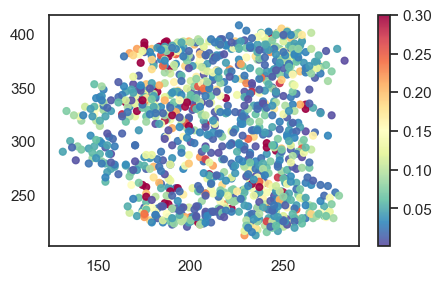

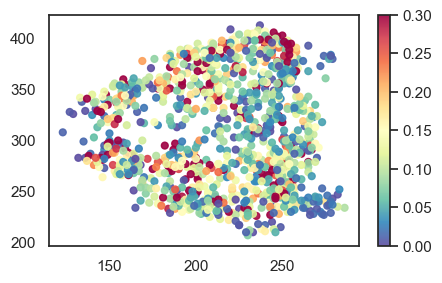

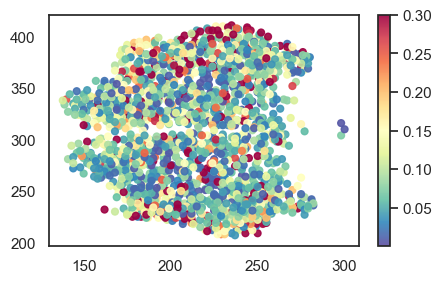

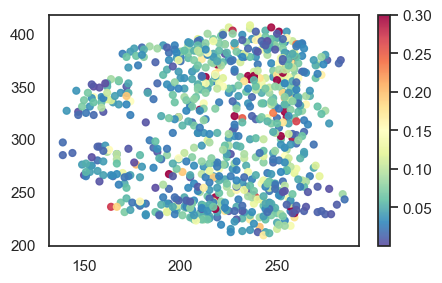

wt


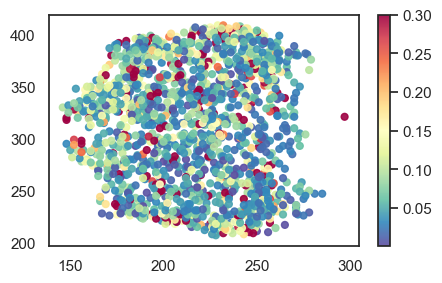

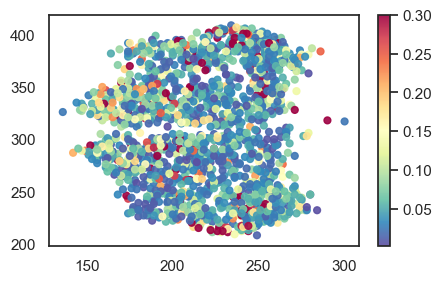

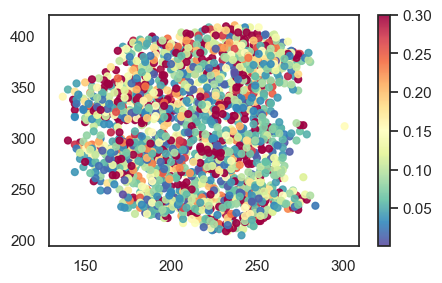

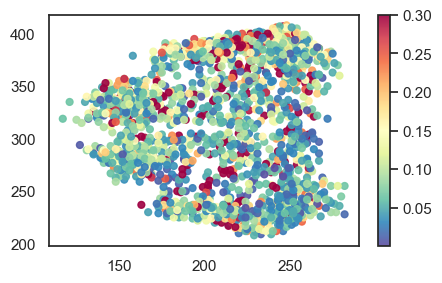

In [256]:
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,0.4))

coord_ch= hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind

for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    spikes = np.mean(bind,axis=1)
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.figure(figsize = (5,3))
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 24, c = spikes , alpha = 0.9, cmap = 'Spectral_r', vmax=0.3)
    plt.colorbar()
    plt.show()
    

coord_ch= wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind
print('wt')
for i in range(len(coord_ch)):
    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'Telencephalon')
    spikes = np.mean(bind,axis=1)
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.figure(figsize = (5,3))
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 24, c = spikes , alpha = 0.9, cmap = 'Spectral_r', vmax=0.3)
    plt.colorbar()
    plt.show()

In [201]:
bind

array([[22.40142822, 12.8087225 ,  7.29997158, ...,  6.34245777,
         5.5432229 ,  1.18677354],
       [ 1.04146612,  1.22579157,  2.63844562, ...,  0.        ,
         1.13259673,  2.68175721],
       [ 4.04788017,  5.01140308, 17.07840729, ...,  3.11619186,
         0.        ,  7.88936043],
       ...,
       [21.98615456,  7.21493196,  0.37541002, ...,  6.23143053,
         0.46923956,  3.62872958],
       [ 1.23603642,  0.17538394, 35.30466843, ...,  0.08725841,
         1.22241664,  1.1783396 ],
       [ 0.48257256,  0.        ,  0.70989388, ...,  3.93356943,
         0.12857452,  0.20594245]])

In [84]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind


for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = mean_amp , alpha = 0.9, cmap = 'coolwarm', vmax = 20)
plt.colorbar()
plt.show()

    trace, dff, bind, coord = tfn.select_region(np.load(dff_ch[i])[:,:time], np.load(dff_ch[i])[:,:time], np.load(bind_ch[i])[:,:time], np.load(coord_ch[i]), 'all')


['BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
 'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
 'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
 'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy']

In [ ]:
#is this reduction in mean event count uniform or localised? 

from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind


for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = mean_amp , alpha = 0.9, cmap = 'coolwarm', vmax = 20)
plt.colorbar()
plt.show()

In [152]:
#SPONTANEOUS
experiment = 'BLNLIGHTPTZ-FOXG1'
os.chdir(Fdrop + 'Project/' + experiment)

wt_lab_coord = sorted(glob.glob('*++*PTZ02_*labcoord.npy*')) 
wt_reg_deltaff = sorted(glob.glob('*++*PTZ02_*regdeltaff.npy*'))
wt_reg_bind = sorted(glob.glob('*++*PTZ02_*regbinarised.npy*'))

het_lab_coord = sorted(glob.glob('*1+-*PTZ02_*labcoord.npy*')) 
het_reg_deltaff = sorted(glob.glob('*1+-*PTZ02_*regdeltaff.npy*'))
het_reg_bind = sorted(glob.glob('*1+-*PTZ02_*regbinarised.npy*'))

hom_lab_coord = sorted(glob.glob('*1---*PTZ02_*labcoord.npy*')) 
hom_reg_deltaff = sorted(glob.glob('*1---*PTZ02_*regdeltaff.npy*'))
hom_reg_bind = sorted(glob.glob('*1---*PTZ02_*regbinarised.npy*'))
wt_lab_coord, wt_reg_deltaff, wt_reg_bind, het_lab_coord, het_reg_deltaff, het_reg_bind, hom_lab_coord, hom_reg_deltaff, hom_reg_bind

NameError: name 'Fdrop' is not defined

In [ ]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind

hom_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    hom_list[i] = corrme(trace[0], sub_coord, cutoff)


In [122]:
def corrme(data, coord, cutoff):
    fullmat = np.corrcoef(data)
    right_n = fullmat[coord[:,0] > cutoff]
    corr = 0
    count=0
    for i in range(right_n.shape[0]):
        corr+= np.mean(right_n[i][coord[:,0] < cutoff])
        count+=1
    corr_mean = corr/count
    return(corr_mean)

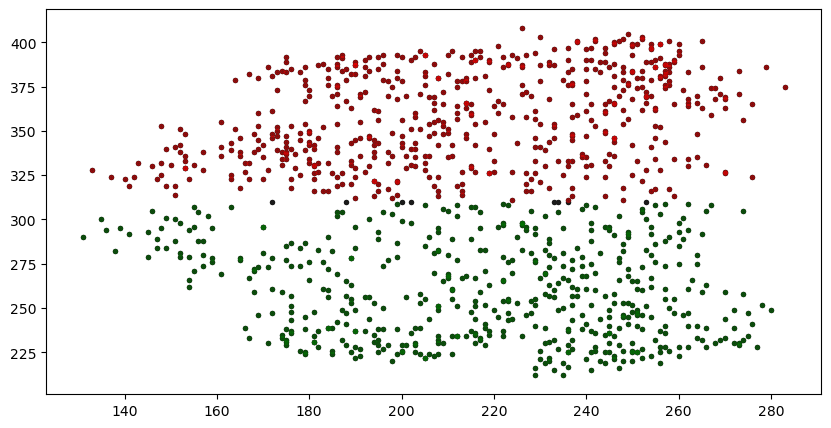

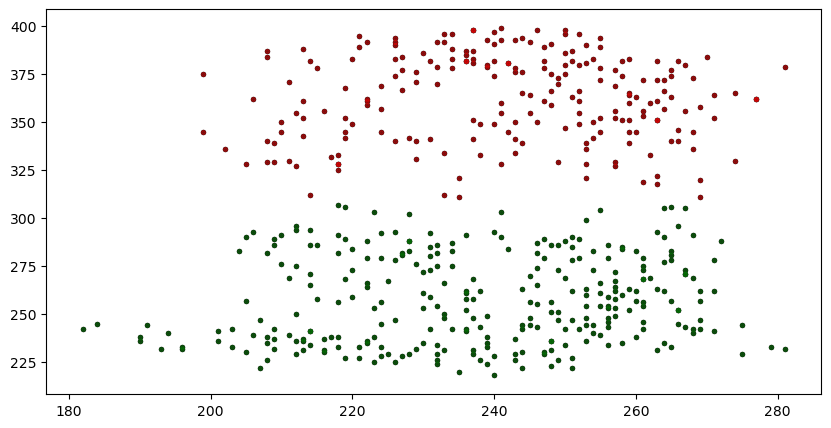

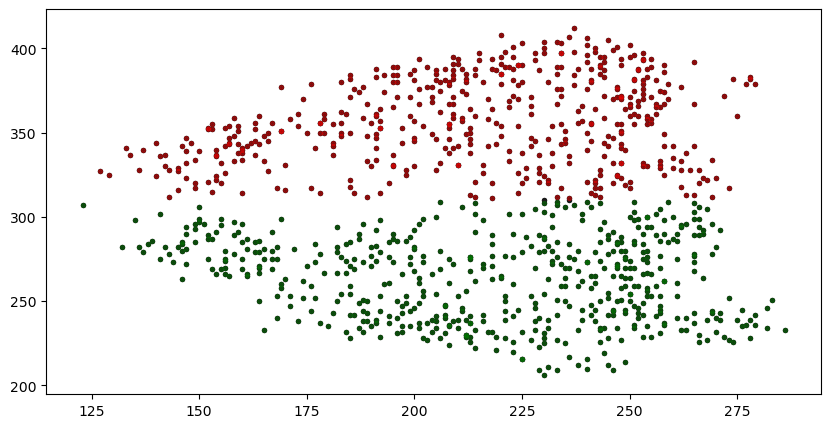

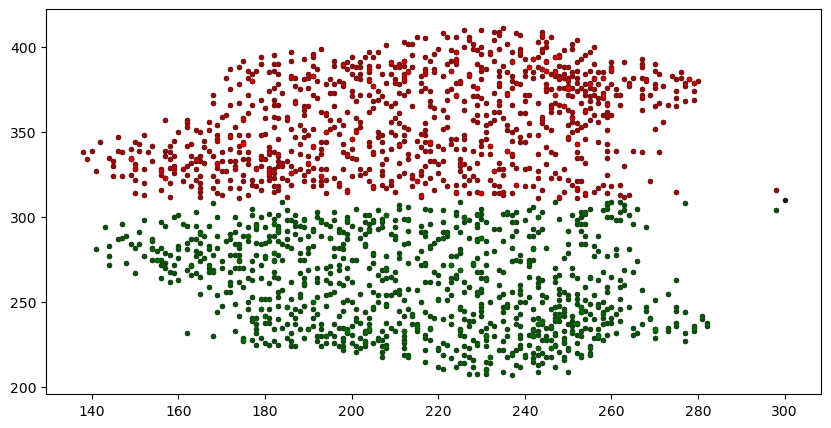

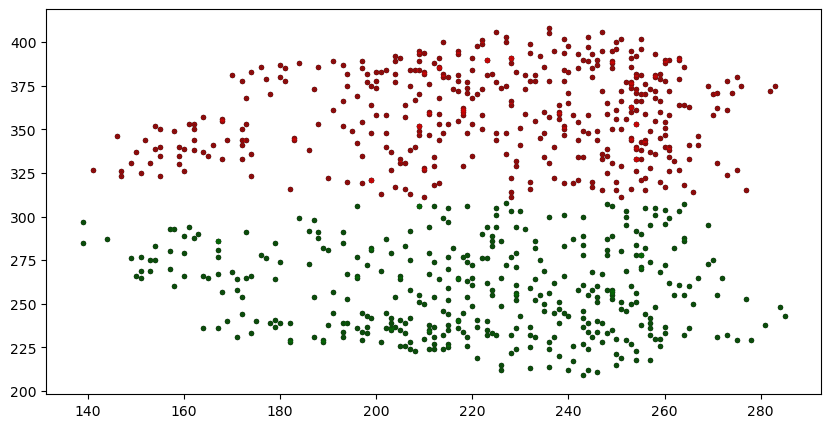

In [155]:
coord_ch = hom_lab_coord
dff_ch = hom_reg_deltaff
bind_ch = hom_reg_bind

hom_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))

    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    hom_list[i] = corrme(trace[0], sub_coord, cutoff)


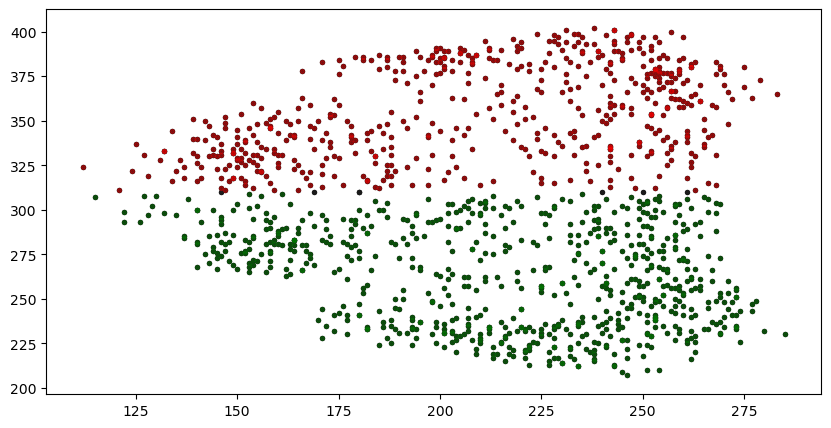

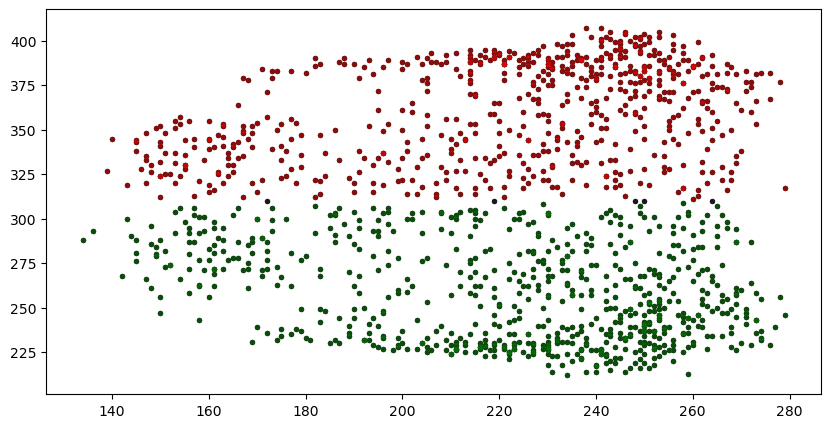

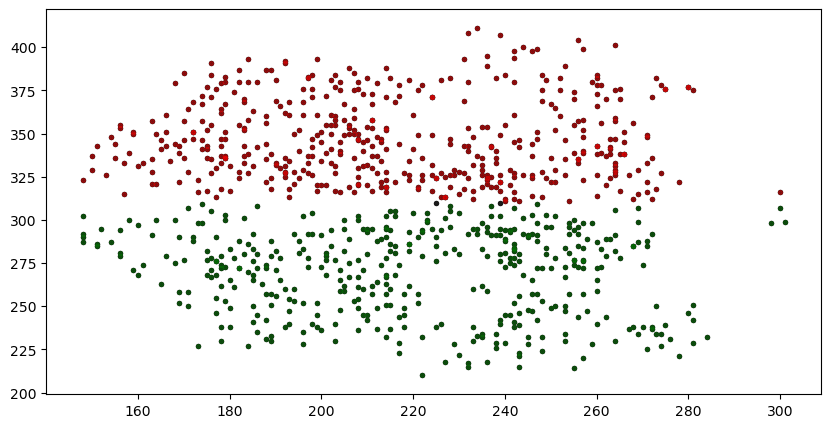

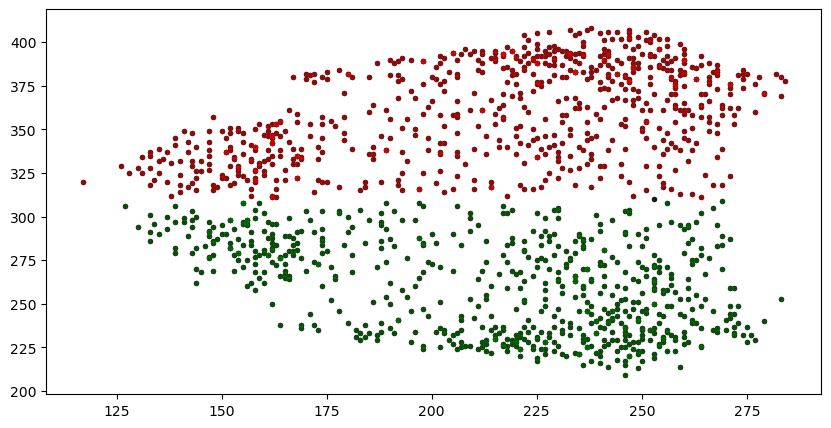

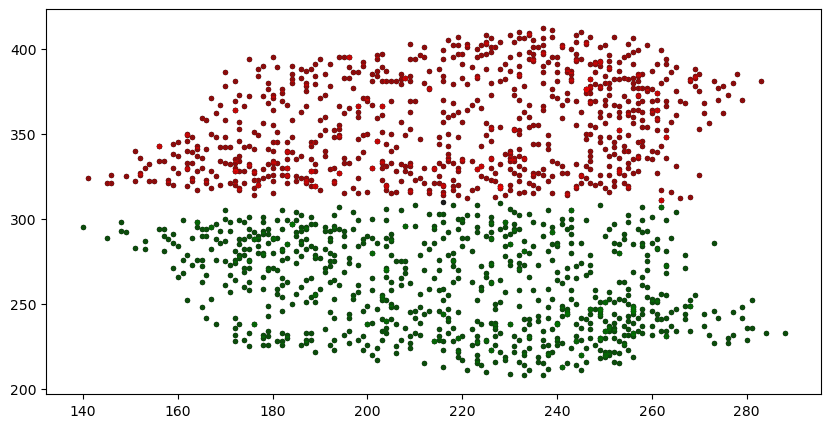

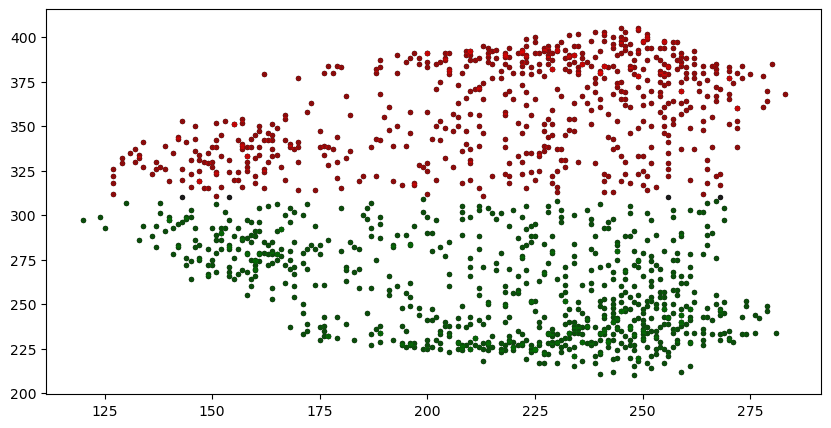

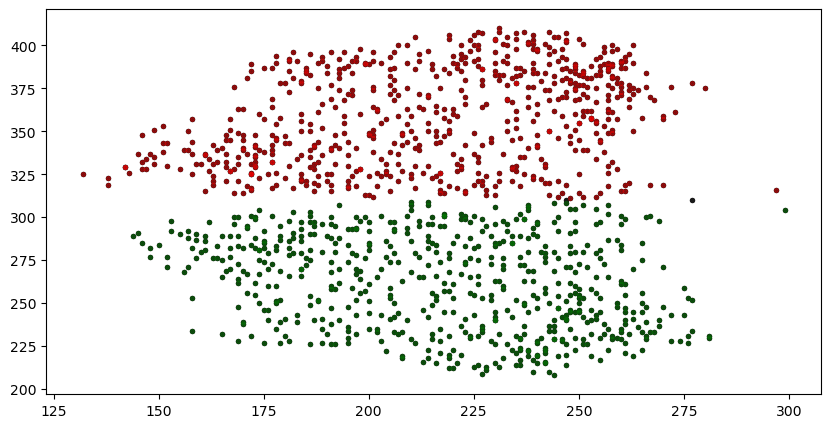

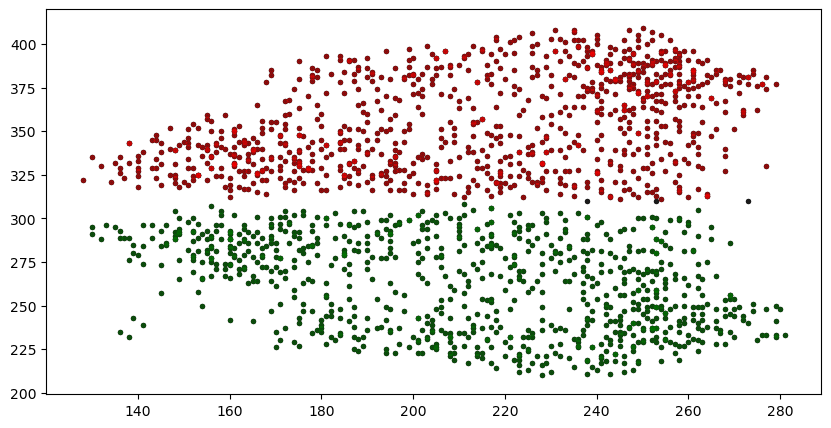

In [157]:
coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind

het_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    het_list[i] = corrme(trace[0], sub_coord, cutoff)


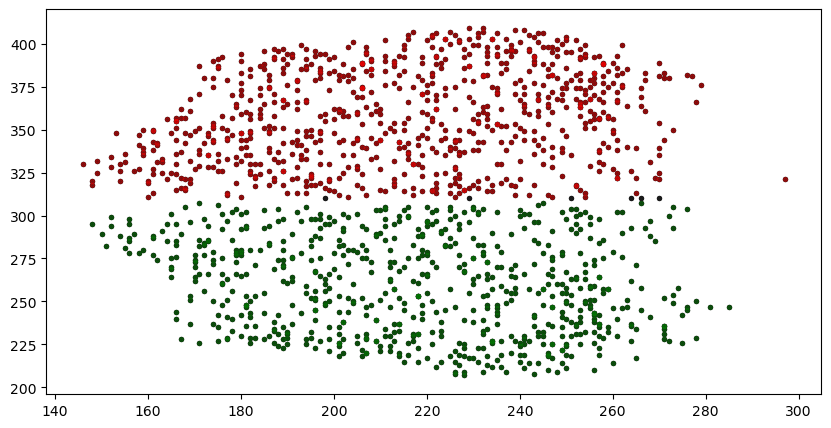

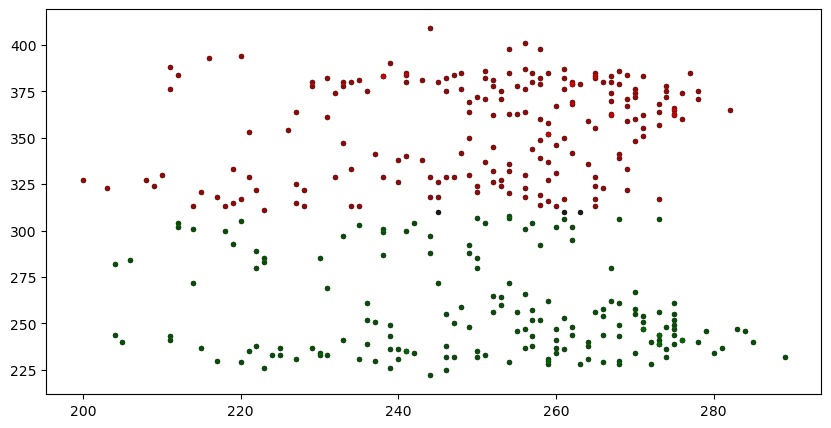

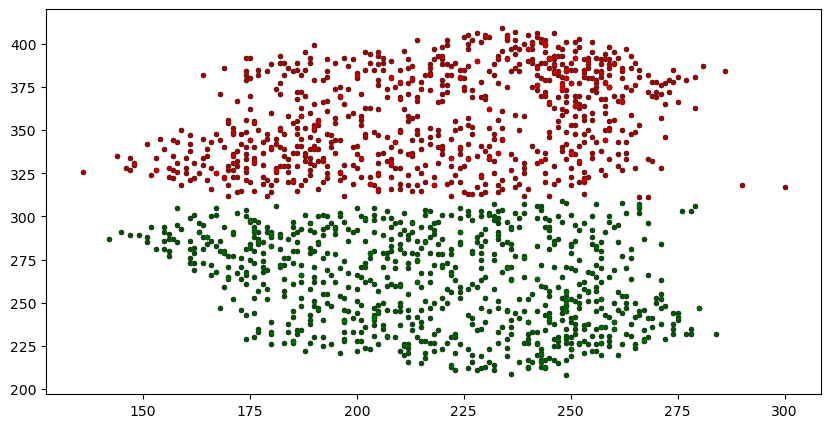

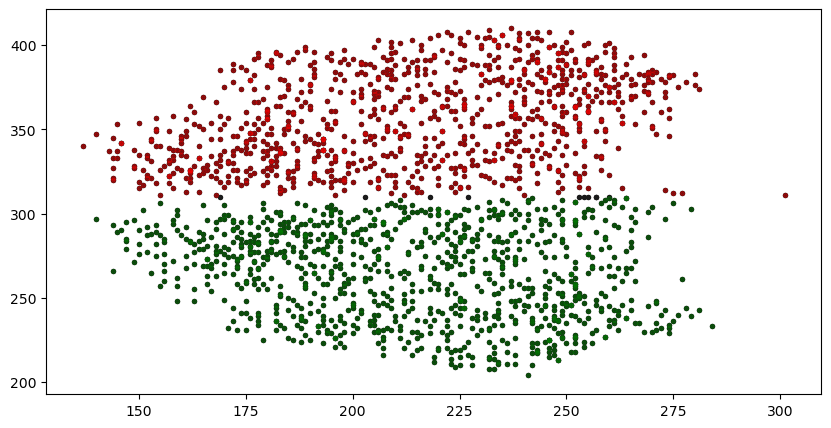

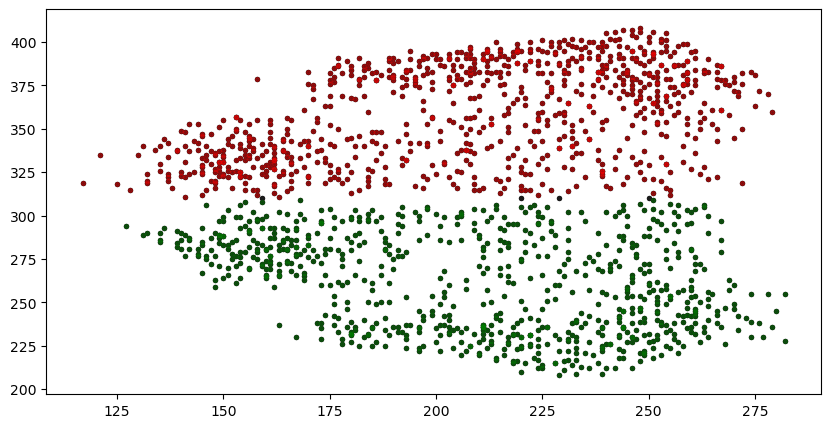

In [158]:
coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind

wt_list = list(range(len(coord_ch)))

for i in range(len(coord_ch)):
    time = 9828
    wt_spikes, wt_amp, wt_n_trans, wt_mean_transdur = list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch))),list(range(len(coord_ch)))
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

    from matplotlib import cm
    plt.figure(figsize = (10,5))

    cutoff = 310
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
    plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
    plt.show()

    wt_list[i] = corrme(trace[0], sub_coord, cutoff)


In [145]:
corrme(trace[0], sub_coord, cutoff)

0.06612412481749158

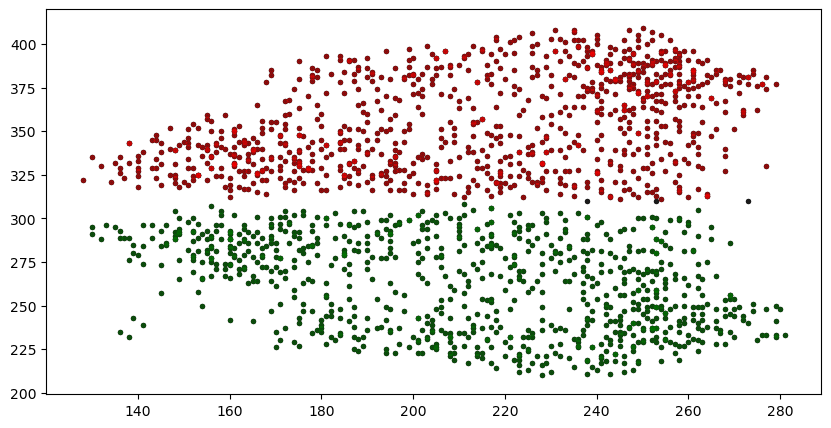

0.0333798206019106

In [146]:
coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind
time = 9828

i = 7
coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')

from matplotlib import cm
plt.figure(figsize = (10,5))

cutoff = 310
sub_coord = (coord[:,:3].astype(float)).astype(int)
plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, alpha = 0.9, c = 'k')
plt.scatter(sub_coord[:,1][sub_coord[:,0] > cutoff],sub_coord[:,0][sub_coord[:,0] > cutoff], s = 8, alpha = 0.4, c = 'red')
plt.scatter(sub_coord[:,1][sub_coord[:,0] < cutoff],sub_coord[:,0][sub_coord[:,0] < cutoff], s = 8, alpha = 0.4, c = 'green')
plt.show()
corrme(trace[0], sub_coord, cutoff)

# Spatial distribution by spike feature

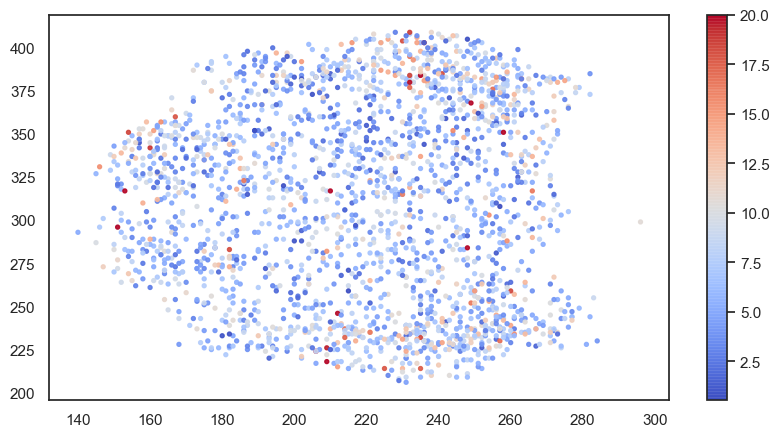

In [480]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind


for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = mean_amp , alpha = 0.9, cmap = 'coolwarm', vmax = 20)
plt.colorbar()
plt.show()

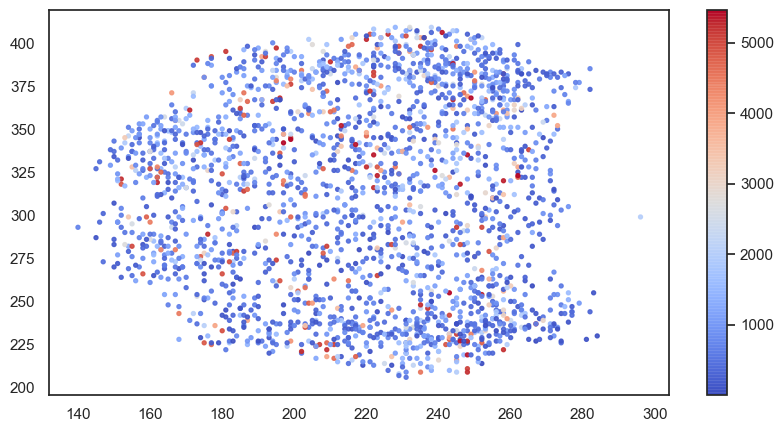

In [476]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = wt_lab_coord
dff_ch = wt_reg_deltaff
bind_ch = wt_reg_bind


for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = spikes , alpha = 0.9, cmap = 'coolwarm')#, vmax = 250000)
plt.colorbar()
plt.show()

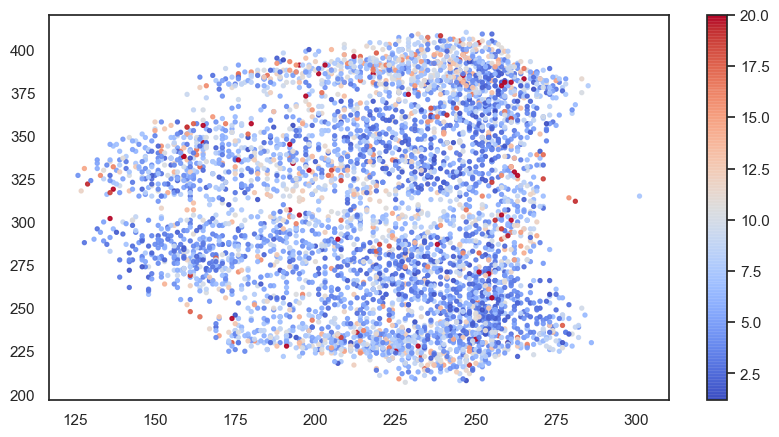

In [481]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = mean_amp , alpha = 0.9, cmap = 'coolwarm', vmax = 20)
plt.colorbar()

plt.show()

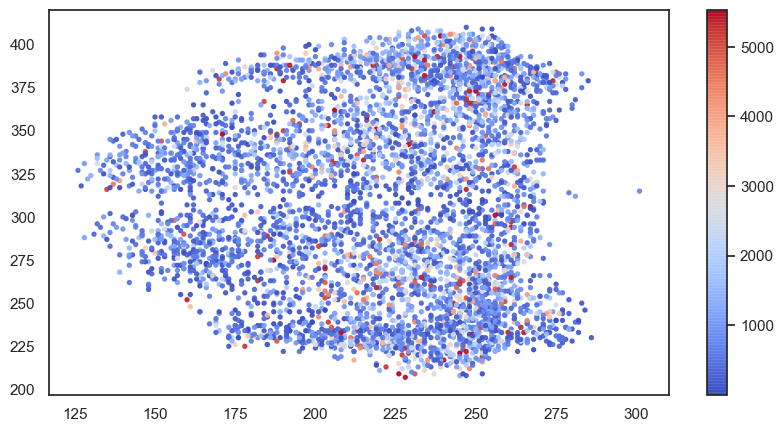

In [474]:
from matplotlib import cm
plt.figure(figsize = (10,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(lab_coord)))

coord_ch = het_lab_coord
dff_ch = het_reg_deltaff
bind_ch = het_reg_bind

for i in range(len(coord_ch)):
    coord, trace = mafn.select_cell_trace(np.load(coord_ch[i]), [np.load(dff_ch[i]), np.load(bind_ch[i])], 'Telencephalon')
    spikes, mean_amp, n_trans, mean_transdur = mafn.spike_stats(trace[1],trace[0])
    sub_coord = (coord[:,:3].astype(float)).astype(int)
    plt.scatter(sub_coord[:,1],sub_coord[:,0], s = 8, c = spikes , alpha = 0.9, cmap = 'coolwarm')
plt.colorbar()

plt.show()

# Functional connectivity

In [6]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
het_tlist = sorted(glob.glob('*1+-*BLNLIGHT*realtrace*'))
hom_tlist =  sorted(glob.glob('*1--*BLNLIGHT*realtrace*'))
wt_tlist = sorted(glob.glob('*1++*BLNLIGHT*realtrace*'))
het_clist = sorted(glob.glob('*1+-*BLNLIGHT*realcoord*'))
hom_clist =  sorted(glob.glob('*1--*BLNLIGHT*realcoord*'))
wt_clist = sorted(glob.glob('*1++*BLNLIGHT*realcoord*'))
wt_tlist, het_tlist, hom_tlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1+--01_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1---01_2photon_sess-01-6dpf_BLNLIGHT_run-01_realtrace.npy'])

In [ ]:
#FCD
from sklearn.metrics.pairwise import euclidean_distances
trace_list = wt_tlist
coord_list = wt_clist
ans_list = list(range(len(trace_list)))

for i in range(len(trace_list)):
    trace = np.load(trace_list[i])
    corr = np.corrcoef(trace)
    dist = euclidean_distances(np.load(coord_list[i]))
    corrdistbin = crfn.corrdis_bin(corr, dist, 50)
    name = trace_list[i][:trace_list[i].find('run') + 7]
    #np.save(savepath + name + 'corrdist.npy', corrdistbin)

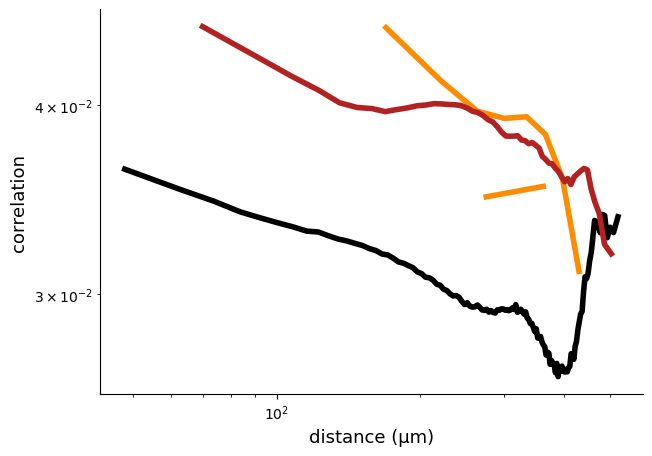

In [30]:
import matplotlib
import powerlaw
from scipy import stats

#BLNLIGHT
plotlist = wt_fclist, het_fclist, hom_fclist
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
colors = ['k', 'darkorange', 'firebrick']


for i in range(len(plotlist)):
    for e in range(len(plotlist[i])):
        data = np.load(plotlist[i][e])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, color = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
#axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

# Eigenspectrum

In [3]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
het_tlist = sorted(glob.glob('*1+-*PTZ02*realtrace*'))
hom_tlist =  sorted(glob.glob('*1--*PTZ02*realtrace*'))
wt_tlist = sorted(glob.glob('*1++*PTZ02*realtrace*'))
wt_tlist, het_tlist, hom_tlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1+--01_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy'],
 ['BLNLIGHTPTZ-FOXG1---01_2photon_sess-01-6dpf_PTZ02_run-01_realtrace.npy'])

In [11]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
het_vlist = sorted(glob.glob('*1+-*PTZ02*eigvar*'))
hom_vlist =  sorted(glob.glob('*1--*PTZ02*eigvar*'))
wt_vlist = sorted(glob.glob('*1++*PTZ02*eigvar*'))
wt_vlist, het_vlist, hom_vlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy'],
 ['BLNLIGHTPTZ-FOXG1+--01_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy'],
 ['BLNLIGHTPTZ-FOXG1---01_2photon_sess-01-6dpf_PTZ02_run-01_eigvar.npy'])

In [ ]:
het_tlist = sorted(glob.glob('*1+-*BLNLIGHT*realtrace*'))
hom_tlist =  sorted(glob.glob('*1--*BLNLIGHT*realtrace*'))
wt_tlist = sorted(glob.glob('*1++*BLNLIGHT*realtrace*'))
wt_tlist, het_tlist, hom_tlist

In [79]:
list_list = wt_tlist, het_tlist, hom_tlist
for i in range(len(list_list)):
    for e in range(len(list_list[i])):
        print(np.load(list_list[i][e]).shape)

(14508, 11521)
(9775, 11521)
(7407, 11466)
(9893, 11521)
(7669, 11466)


In [ ]:
from sklearn import decomposition
data_list = wt_tlist
comp = 7000
for i in range(len(data_list)):
    data = np.load(data_list[i])
    pca = decomposition.PCA(comp)
    fit = pca.fit(data)
    var = fit.explained_variance_ratio_
    name = data_list[i][:data_list[i].find('run') + 7]
    np.save(savepath + name + 'eigvar.npy', var)

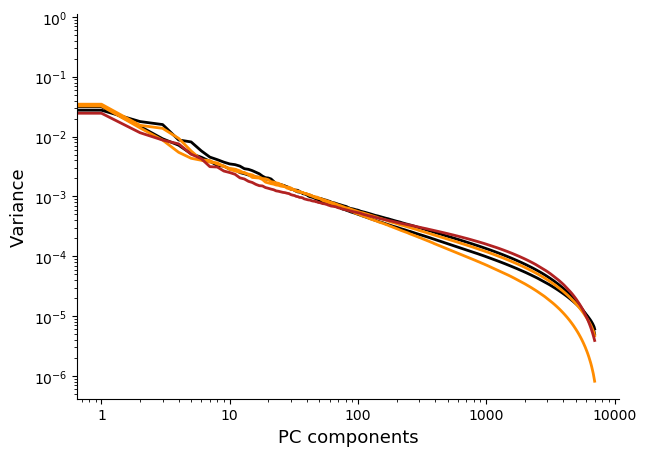

In [10]:
#BLNLIGHT
import matplotlib
import powerlaw
from scipy import stats
    
#BLNLIGHT
plotlist = wt_vlist, het_vlist, hom_vlist
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
colors = ['k', 'darkorange', 'firebrick']

for i in range(len(plotlist)):
    for e in range(len(plotlist[i])):
        data = np.load(plotlist[i][e])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
    

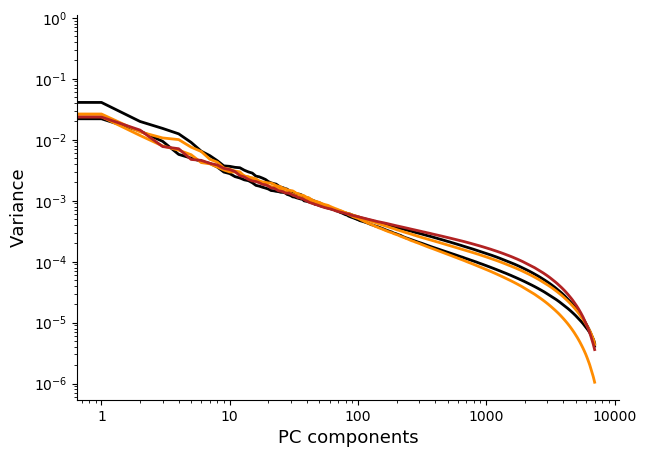

In [12]:
#PTZ02
import matplotlib
import powerlaw
from scipy import stats
    
#BLNLIGHT
plotlist = wt_vlist, het_vlist, hom_vlist
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
colors = ['k', 'darkorange', 'firebrick']

for i in range(len(plotlist)):
    for e in range(len(plotlist[i])):
        data = np.load(plotlist[i][e])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
    